# HomeWork 6 Problem 2A and 2B

# Matthew Anderson | 801203905

# Github https://github.com/Mand187/Intro-to-ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
def loadBreastCancerData():
    # Load breast cancer dataset
    cancerData = load_breast_cancer()
    X = cancerData.data
    y = cancerData.target

    return X, y

In [3]:
def createNeuralNetworkModel(inputDim, hiddenLayers=1):
    model = Sequential()

    # Input layer
    model.add(Dense(32, input_dim=inputDim, activation='relu'))

    # Additional hidden layers
    for _ in range(hiddenLayers - 1):
        model.add(Dense(32, activation='relu'))

    # Output layer with sigmoid for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [4]:
def trainNeuralNetwork(xTrain, yTrain, xVal, yVal, hiddenLayers=1):
    # Standardize features
    scaler = StandardScaler()
    xTrainScaled = scaler.fit_transform(xTrain)
    xValScaled = scaler.transform(xVal)

    # Create model
    model = createNeuralNetworkModel(xTrain.shape[1], hiddenLayers)

    # Early stopping
    earlyStopping = EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    )

    # Train the model
    startTime = time.time()
    history = model.fit(
        xTrainScaled, yTrain,
        validation_data=(xValScaled, yVal),
        epochs=200,
        batch_size=32,
        callbacks=[earlyStopping],
        verbose=1
    )
    trainingTime = time.time() - startTime

    return model, history, trainingTime

In [5]:
def plotTrainingHistory(history, title):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title(f'{title} - Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title(f'{title} - Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [6]:
def evaluateModel(model, xTest, yTest):
    # Standardize features
    scaler = StandardScaler()
    xTestScaled = scaler.fit_transform(xTest)

    # Predict probabilities
    yPredProb = model.predict(xTestScaled)
    yPred = (yPredProb > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(yTest, yPred)
    classReport = classification_report(yTest, yPred)
    confMatrix = confusion_matrix(yTest, yPred)

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confMatrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return {
        'accuracy': accuracy,
        'classification_report': classReport
    }


Part A: Single Hidden Layer Neural Network


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.6792 - loss: 0.5794 - val_accuracy: 0.8681 - val_loss: 0.4005
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8902 - loss: 0.3722 - val_accuracy: 0.9231 - val_loss: 0.3120
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9215 - loss: 0.2925 - val_accuracy: 0.9341 - val_loss: 0.2630
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9292 - loss: 0.2512 - val_accuracy: 0.9451 - val_loss: 0.2349
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9525 - loss: 0.1959 - val_accuracy: 0.9451 - val_loss: 0.2161
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9525 - loss: 0.1797 - val_accuracy: 0.9451 - val_loss: 0.2026
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9594 - loss: 0.1452 - val_accuracy: 0.9451 - val_loss: 0.1915
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9553 - loss: 0.1544 - val_accuracy: 0.95

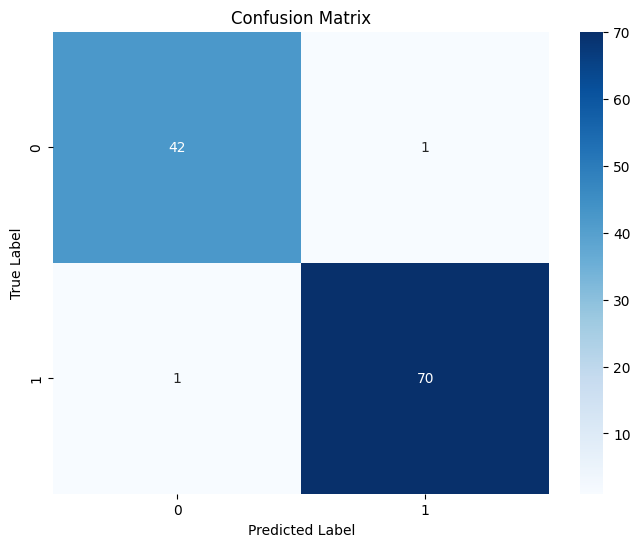

Test Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



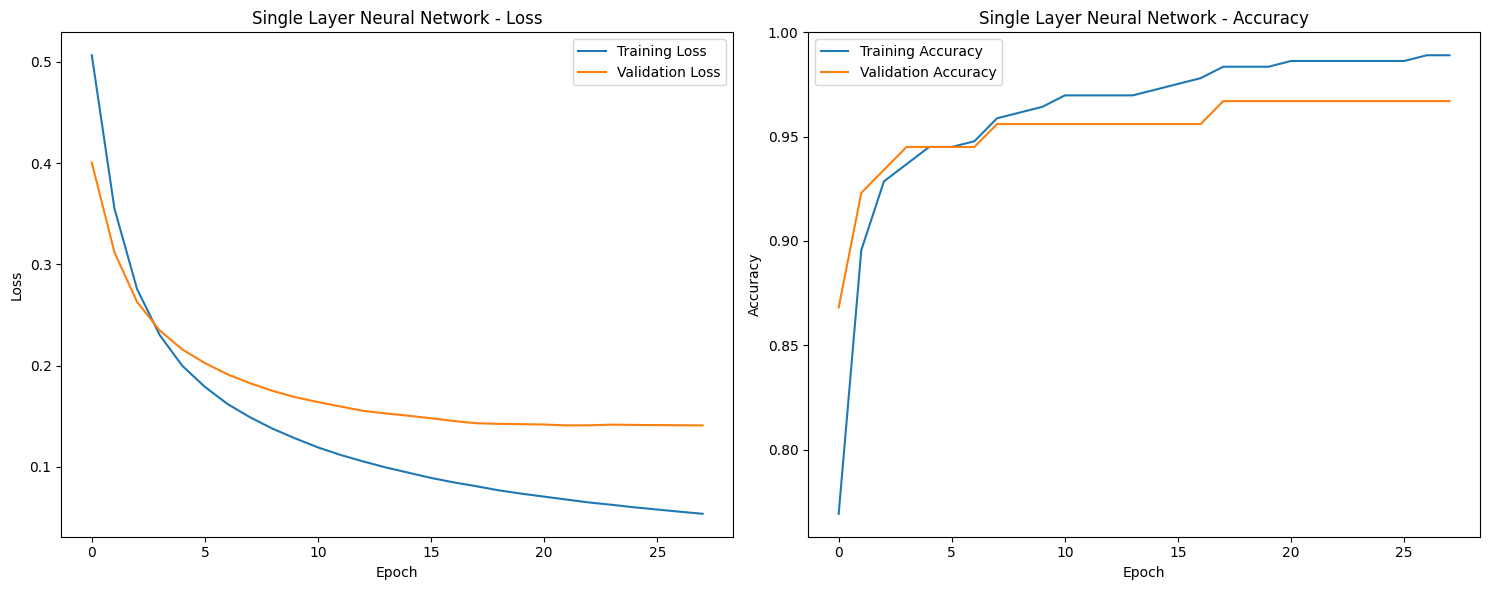


Part B: Three Hidden Layers Neural Network
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4797 - loss: 0.7026 - val_accuracy: 0.9011 - val_loss: 0.5019
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9164 - loss: 0.4768 - val_accuracy: 0.9341 - val_loss: 0.3547
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9694 - loss: 0.3212 - val_accuracy: 0.9341 - val_loss: 0.2459
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9688 - loss: 0.2005 - val_accuracy: 0.9451 - val_loss: 0.1760
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9650 - loss: 0.1354 - val_accuracy: 0.9560 - val_loss: 0.1503
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9848 - loss: 0.0813 - val_accuracy: 0.9560 - val_loss: 0.1375
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9669 - loss: 0.0815 - val_accuracy: 0.9560 - val_loss: 0.1257
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9810 - loss: 0.0581 - val_accuracy: 0.9670 - val_loss: 0.

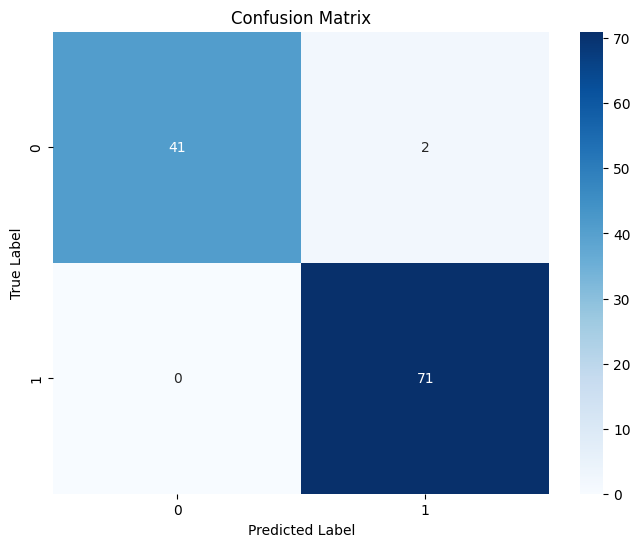

Test Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



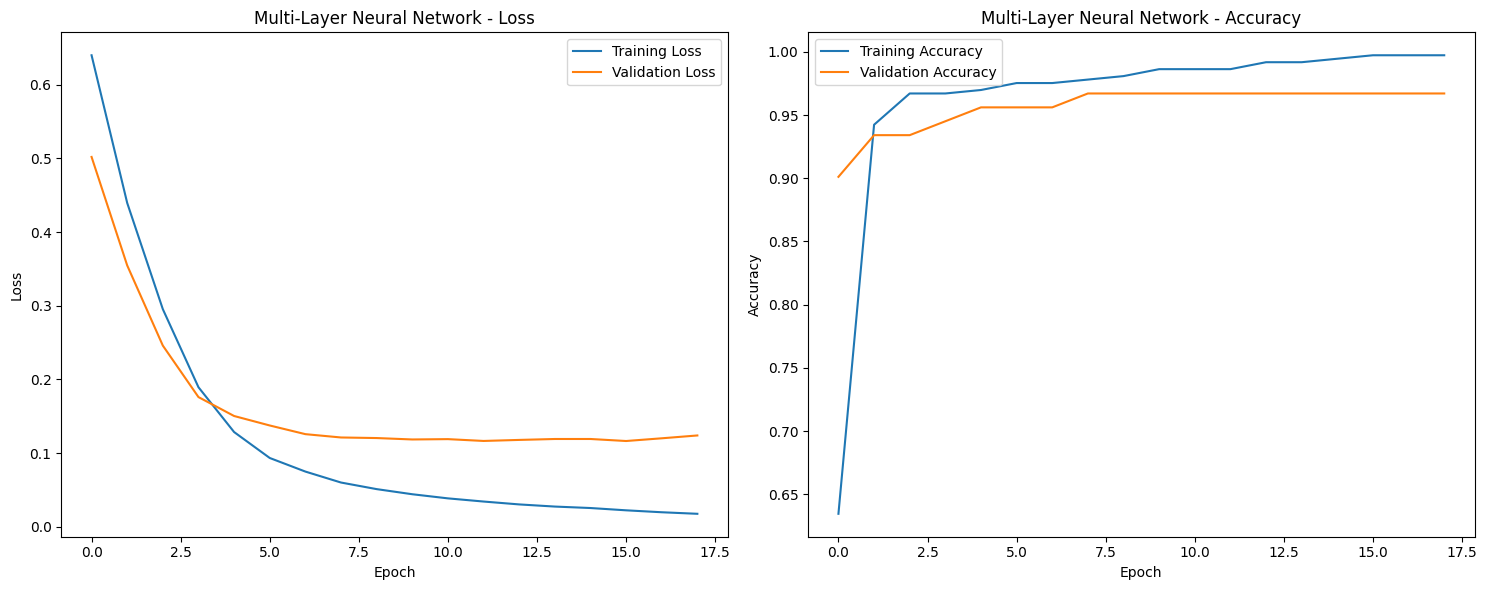

In [7]:
# Load and preprocess data
X, y = loadBreastCancerData()

# Split data
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.2, random_state=42)

# Part a: Single Hidden Layer Neural Network
print("Part A: Single Hidden Layer Neural Network")
modelSingle, historySingle, trainingTimeSingle = trainNeuralNetwork(xTrain, yTrain, xVal, yVal, hiddenLayers=1)

print(f"Training Time: {trainingTimeSingle:.2f} seconds")
print(f"Final Training Loss: {historySingle.history['loss'][-1]:.4f}")
print(f"Final Validation Accuracy: {historySingle.history['val_accuracy'][-1]:.4f}")

# Evaluate single layer model
print("\nSingle Layer Model Evaluation:")
singleLayerEval = evaluateModel(modelSingle, xTest, yTest)
print(f"Test Accuracy: {singleLayerEval['accuracy']:.4f}")
print("\nClassification Report:")
print(singleLayerEval['classification_report'])

# Plot training history for single layer
plotTrainingHistory(historySingle, 'Single Layer Neural Network')

In [ ]:
# Part b: Three Hidden Layers Neural Network
print("\nPart B: Three Hidden Layers Neural Network")
modelMulti, historyMulti, trainingTimeMulti = trainNeuralNetwork(xTrain, yTrain, xVal, yVal, hiddenLayers=3)

print(f"Training Time: {trainingTimeMulti:.2f} seconds")
print(f"Final Training Loss: {historyMulti.history['loss'][-1]:.4f}")
print(f"Final Validation Accuracy: {historyMulti.history['val_accuracy'][-1]:.4f}")

# Evaluate multi-layer model
print("\nMulti-Layer Model Evaluation:")
multiLayerEval = evaluateModel(modelMulti, xTest, yTest)
print(f"Test Accuracy: {multiLayerEval['accuracy']:.4f}")
print("\nClassification Report:")
print(multiLayerEval['classification_report'])

# Plot training history for multi-layer
plotTrainingHistory(historyMulti, 'Multi-Layer Neural Network')